In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# CNN - Convolutional Neural Networks

In [2]:
from sklearn.datasets import load_sample_image

In [3]:
china = load_sample_image('china.jpg')

In [4]:
china.shape

(427, 640, 3)

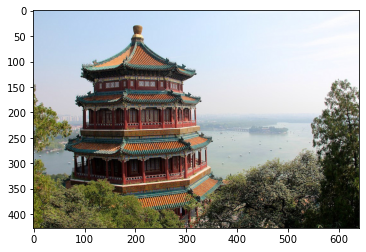

In [5]:
plt.imshow(china)

In [6]:
flower = load_sample_image('flower.jpg')

In [ ]:
flower.shape

In [ ]:
plt.imshow(flower)

In [ ]:
images = np.array([china,flower])

In [ ]:
images.shape

In [ ]:
batch_size, height, width, channels = images.shape

In [ ]:
filters

In [ ]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

In [ ]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()


In [ ]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

In [ ]:
row_r1 = a[1, :]
row_r1

In [ ]:
row_r2 = a[1:2, :]
row_r2

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

In [ ]:
x

In [ ]:
y

In [ ]:
x*y

In [ ]:
np.dot(x,y)

In [ ]:
a = np.array([[1,2],[3,4]])

In [ ]:
np.sum(a)

In [ ]:
np.sum(a,axis=0) #row-wise total

In [ ]:
np.sum(a,axis=1) #column-wise total

### BroadCasting

In [ ]:
x = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

In [ ]:
v = np.array([1,0,1])

In [ ]:
v

In [ ]:
np.tile(v,(4,1))

In [ ]:
x+v

In [ ]:
v = np.array([1,0,1])

In [ ]:
x+v

<b>+></b> Without tiling it adjusts, so it is broadcasted from (3,) to (4,3) and added to x

In [ ]:
x = np.array([[1,2,3],[4,5,6]])

In [ ]:
w = np.array([4,5])

In [ ]:
(x.T+w).T

In [ ]:
w = w.reshape(2,1)

In [ ]:
x+w

In [ ]:
# Reduced equation by using broadcasting

In [ ]:
plt.subplot(1,2,1)
plt.imshow(china)
plt.subplot(1,2,2)
plt.imshow(china*[1,0.95,0.9])

1D array

In [ ]:
x = np.array([1,2,3]) # 1D array

In [ ]:
x.reshape(1,3)

2D array

In [ ]:
x = np.array([[1,2],[3,4]])

In [ ]:
x

3D array

In [ ]:
x = np.array([
    [[1,2,3],
     [4,5,6],
     [7,8,9]],
    [[10,11,12],
     [13,14,15],
     [16,17,18]],
    [[19,20,21],
     [22,23,24],
     [25,26,27]]])

In [ ]:
tf

In [ ]:
plt.imshow(china)

In [ ]:
china_single_channel = china[:400,:400,0]

In [ ]:
plt.imshow(china_single_channel)

In [ ]:
conv_filter = np.array(
[
    [1,0,1],
    [1,0,1],
    [1,0,1]
])

In [ ]:
N = len(china_single_channel)

In [ ]:
china_single_channel.shape

flatten the image

In [ ]:
china_sc = china_single_channel

In [ ]:
china_sc.shape

In [10]:
def flatten(array):
    return array.reshape(1,-1)[0]
def cropped(array):
    return array[1:-1,1:-1]

In [ ]:
convoluted_image = []
for index, pixel in enumerate(flatten(cropped(china_sc))):
    image_window = flatten(china_sc)[[index-N-1, index-N, index-N+1, index-1, index, index+1, index+N-1, index+N, index+N+1]]
    convoluted_pixel = np.dot(image_window,flatten(conv_filter))
    convoluted_image.append(convoluted_pixel)

In [ ]:
convoluted_image = np.array(convoluted_image)
convoluted_image.shape

In [ ]:
convoluted_image = convoluted_image.reshape(398,398)
convoluted_image.shape

In [ ]:
plt.imshow(convoluted_image)

In [7]:
a = np.array([
    [1,1,1,1,1,1,1,1],
    [2,2,2,2,2,2,2,2],
    [3,3,3,3,3,3,3,3],
    [4,4,4,4,4,4,4,4],
    [5,5,5,5,5,5,5,5],
    [6,6,6,6,6,6,6,6],
    [7,7,7,7,7,7,7,7],
    [8,8,8,8,8,8,8,8]
])

In [8]:
a.shape

(8, 8)

In [11]:
cropped(a) # correct

array([[2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7]])

In [12]:
flatten(a) # correct

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8])

In [13]:
a[:3,:3]

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [ ]:
conv_filter

In [ ]:
np.dot(a[:3,:3],conv_filter)

In [ ]:
np.sum(np.dot(a[:3,:3],conv_filter))

In [ ]:
np.dot(flatten(a[:3,:3]),flatten(conv_filter))

# Numpy dot() only dot products with 1D arrays

# For 2D arrays, dot(0 does matrix multiplication

Convolving image

In [ ]:
china_sc = china[:400,:400,0] # china single channel

In [ ]:
china_sc = china_sc/256

In [ ]:
plt.imshow(china_sc)

In [ ]:
china_sc.shape

In [ ]:
N = len(china_sc)
N

In [14]:
conv_filter = np.array(
[
    [1,0,1],
    [1,0,1],
    [1,0,1]
])
conv_filter

array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1]])

In [15]:
def flatten(array):
    return array.reshape(1,-1)
def cropped(array):
    return array[1:-1,1:-1]

In [16]:
def convolve(a,b):
    conv = [i*j for i,j in zip(a,b)]
    return np.sum(conv)

In [17]:
conv_filter

array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1]])

In [18]:
a = np.array([
    [1,2,3,4],
    [2,3,4,5],
    [5,6,7,8],
    [6,7,8,9]
])

In [41]:
a[1:-1,1:-1]

array([[3, 4],
       [6, 7]])

In [53]:
indices_matrix = np.array(range((N-2)*(N-2))).reshape(2,2)

In [54]:
indices_matrix

array([[0, 1],
       [2, 3]])

In [55]:
indices_matrix[:1] = indices_matrix[:1] + N + 1
indices_matrix[1:] = indices_matrix[1:] + N + 1 + 2

In [61]:
indices_matrix

array([[ 5,  6],
       [ 9, 10]])

In [62]:
indices_matrix = flatten(indices_matrix)[0]

In [67]:
indices_matrix

array([ 5,  6,  9, 10])

In [87]:
convoluted_image = []
for index, pixel in enumerate(flatten(a)[0]):
    if index in indices_matrix:
        print(index)
        image_window = flatten(a)[0][[index-N-1,index-N,index-N+1,index-1,index,index+1,index+N-1,index+N,index+N+1]]
        convoluted_pixel = convolve(image_window,flatten(conv_filter)[0])
        convoluted_image.append(convoluted_pixel)

5
6
9
10


In [88]:
convoluted_image

[22, 28, 32, 38]

In [89]:
# It worked now, tomorrow find more generic solution